# РК ИУ5-61Б Овчинников Степан Вариант 13

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [2]:
data = pd.read_csv('states_all_extended.csv')

In [3]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

PRIMARY_KEY              object
STATE                    object
YEAR                      int64
ENROLL                  float64
TOTAL_REVENUE           float64
                         ...   
G08_AM_A_MATHEMATICS    float64
G08_HP_A_READING        float64
G08_HP_A_MATHEMATICS    float64
G08_TR_A_READING        float64
G08_TR_A_MATHEMATICS    float64
Length: 266, dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                   491
TOTAL_REVENUE            440
                        ... 
G08_AM_A_MATHEMATICS    1655
G08_HP_A_READING        1701
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 266, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 266 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(263), int64(1), object(2)
memory usage: 3.5+ MB


### Обработка пропусков

In [7]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['G08_AM_A_MATHEMATICS','G08_HP_A_READING'], axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 264 entries, PRIMARY_KEY to G08_TR_A_MATHEMATICS
dtypes: float64(261), int64(1), object(2)
memory usage: 3.5+ MB


### Обработка пропусков в числовых данных

In [9]:
# Заполняем отсутствующие значения 
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].replace(0,np.nan)
data['TOTAL_REVENUE'] = data['TOTAL_REVENUE'].fillna(data['TOTAL_REVENUE'].mean())

In [10]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.isnull().sum()
# проверим есть ли пропущенные значения в столбце TOTAL_REVENUE

PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                   491
TOTAL_REVENUE              0
                        ... 
G08_AS_A_MATHEMATICS    1558
G08_AM_A_READING        1654
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 264, dtype: int64

### Обработка пропусков в категориальных данных

In [12]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1715


In [13]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

In [14]:
# Заполняем отсутствующие значения 
data['ENROLL'] = data.fillna("Nane")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,1992_ALABAMA,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,1992_ALASKA,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,1992_ARIZONA,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,1992_ARKANSAS,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,1992_CALIFORNIA,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.isnull().sum()
# проверим есть ли пропущенные значения в столбце ENROLL

PRIMARY_KEY                0
STATE                      0
YEAR                       0
ENROLL                     0
TOTAL_REVENUE              0
                        ... 
G08_AS_A_MATHEMATICS    1558
G08_AM_A_READING        1654
G08_HP_A_MATHEMATICS    1702
G08_TR_A_READING        1574
G08_TR_A_MATHEMATICS    1570
Length: 264, dtype: int64

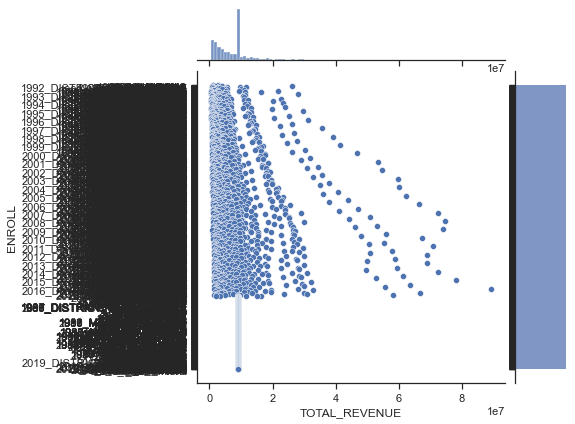

In [16]:
# Увеличенные диаграммы рассеяния 
sns.jointplot(x = "TOTAL_REVENUE", y = "ENROLL", kind="scatter", data = data)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='ENROLL'>

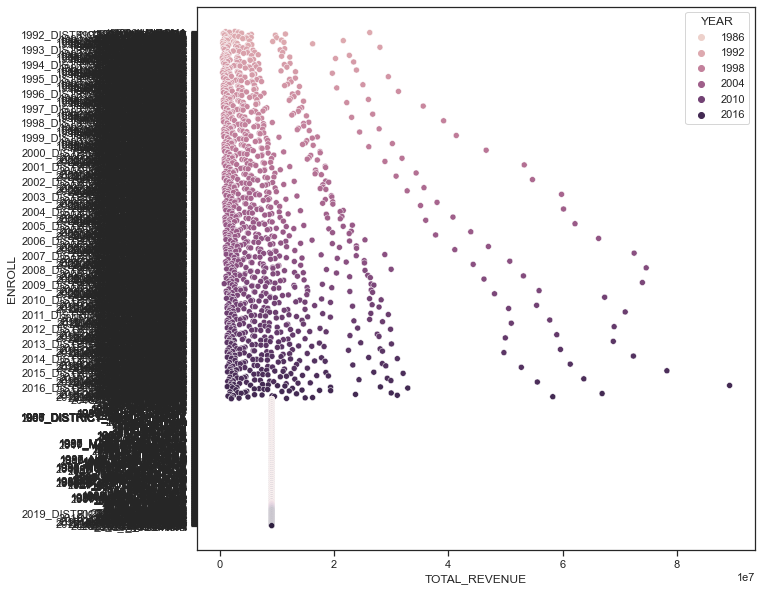

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x = "TOTAL_REVENUE", y = "ENROLL", data=data, hue='YEAR')